# ML Project (Weather Dataset)

In [365]:
import pandas as pd 
import numpy as np


In [366]:
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [367]:
df.shape

(96453, 12)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [369]:
# looking for null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [370]:
# drop null values
df.dropna(inplace=True)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [371]:
df['Summary'].nunique()

27

In [372]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [373]:
df['Summary'].value_counts()

Summary
Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [374]:
#finding top 3 most common weather conditions
topClasses= df['Summary'].value_counts().head(3)
topClasses

Summary
Partly Cloudy    31635
Mostly Cloudy    27914
Overcast         16516
Name: count, dtype: int64

In [375]:
# reducing dataset to top 3 weather conditions
df1 = df[df['Summary'].isin(topClasses.index)]
df1

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [376]:
topClasses.index

Index(['Partly Cloudy', 'Mostly Cloudy', 'Overcast'], dtype='object', name='Summary')

In [377]:
df1.shape

(76065, 12)

### normalization
### label encoding
### one hot encoding if logistic regression
### split data 

##  Encoding Categorical Variables

In [378]:
# encoding summary
# df1['Summary'].unique()

In [379]:
# df1['Summary']= df1['Summary'].replace({'Partly Cloudy': 0, 'Mostly Cloudy': 1, 'Overcast': 2})
# df1

In [380]:
# encoding  Summary
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Summary'] = le.fit_transform(df1['Summary'])
df1

C:\Users\Home\AppData\Local\Temp\ipykernel_11884\2424738758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Summary'] = le.fit_transform(df1['Summary'])


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,2,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,2,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,0,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,2,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,0,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,2,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,2,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,2,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,2,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


### Can use one-hot encoding on features as well. Which one to use??

In [381]:
# df1 = pd.get_dummies(df1, columns=['Precip Type'], drop_first=True)
# df1

In [382]:
# encoding all other features
df1['Daily Summary'] = le.fit_transform(df1['Daily Summary'])
df1['Precip Type'] = le.fit_transform(df1['Precip Type'])
df1

C:\Users\Home\AppData\Local\Temp\ipykernel_11884\4056643697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Daily Summary'] = le.fit_transform(df1['Daily Summary'])
C:\Users\Home\AppData\Local\Temp\ipykernel_11884\4056643697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Precip Type'] = le.fit_transform(df1['Precip Type'])


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,2,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,195
1,2006-04-01 01:00:00.000 +0200,2,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,195
2,2006-04-01 02:00:00.000 +0200,0,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,195
3,2006-04-01 03:00:00.000 +0200,2,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,195
4,2006-04-01 04:00:00.000 +0200,0,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,195
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,2,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,168
96449,2016-09-09 20:00:00.000 +0200,2,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,168
96450,2016-09-09 21:00:00.000 +0200,2,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,168
96451,2016-09-09 22:00:00.000 +0200,2,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,168


In [383]:
# checking for outliers
df1.describe()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,76065.000000,76065.000000,76065.000000,76065.000000,76065.000000,76065.000000,76065.000000,76065.000000,76065.0,76065.000000,76065.000000
mean,1.048919,0.081588,12.934276,11.926915,0.717642,10.999576,189.436705,11.010971,0.0,1010.610467,133.808453
std,0.883452,0.273738,9.219582,10.384776,0.192186,6.248252,107.434091,3.388387,0.0,74.847808,53.070607
min,0.000000,0.000000,-20.555556,-24.233333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,6.044444,3.794444,0.580000,6.295100,118.000000,9.982000,0.0,1011.630000,109.000000
50%,1.000000,0.000000,12.777778,12.777778,0.760000,10.593800,182.000000,10.352300,0.0,1015.900000,130.000000
75%,2.000000,0.000000,19.772222,19.772222,0.870000,14.345100,290.000000,14.908600,0.0,1020.200000,191.000000
max,2.000000,1.000000,39.588889,39.344444,1.000000,32.827900,359.000000,16.100000,0.0,1046.060000,210.000000


In [384]:
df1.drop('Formatted Date', axis=1, inplace=True)
df1.corr()

C:\Users\Home\AppData\Local\Temp\ipykernel_11884\2060055322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Formatted Date', axis=1, inplace=True)


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Summary,1.000000,-0.025528,0.172104,0.169852,-0.185929,-0.093861,-0.008116,0.098320,NaN,0.014464,0.306079
Precip Type,-0.025528,1.000000,-0.513487,-0.520792,0.184519,-0.038072,-0.035434,-0.230899,NaN,0.029655,-0.191913
Temperature (C),0.172104,-0.513487,1.000000,0.993431,-0.619004,-0.036756,0.029044,0.299107,NaN,-0.020260,0.403854
Apparent Temperature (C),0.169852,-0.520792,0.993431,1.000000,-0.590353,-0.092352,0.029947,0.295868,NaN,-0.018165,0.400469
Humidity,-0.185929,0.184519,-0.619004,-0.590353,1.000000,-0.179774,0.011264,-0.267324,NaN,-0.018966,-0.335084
Wind Speed (km/h),-0.093861,-0.038072,-0.036756,-0.092352,-0.179774,1.000000,0.083659,0.037200,NaN,-0.044348,-0.043723
Wind Bearing (degrees),-0.008116,-0.035434,0.029044,0.029947,0.011264,0.083659,1.000000,0.032473,NaN,-0.009729,0.044010
Visibility (km),0.098320,-0.230899,0.299107,0.295868,-0.267324,0.037200,0.032473,1.000000,NaN,0.020951,0.330586
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),0.014464,0.029655,-0.020260,-0.018165,-0.018966,-0.044348,-0.009729,0.020951,NaN,1.000000,0.029472


In [385]:
df1['Loud Cover'].unique()

array([0.])

In [386]:
df1.drop('Loud Cover', axis=1, inplace=True)
df1

C:\Users\Home\AppData\Local\Temp\ipykernel_11884\2188509115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Loud Cover', axis=1, inplace=True)


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,195
1,2,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,195
2,0,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,195
3,2,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,195
4,0,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,195
...,...,...,...,...,...,...,...,...,...,...
96448,2,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,168
96449,2,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,168
96450,2,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,168
96451,2,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,168


In [387]:
df1['Daily Summary'].nunique()

211

In [388]:
# high cardinality in Daily Summary
# df1.drop('Daily Summary', axis=1, inplace=True)
# df1

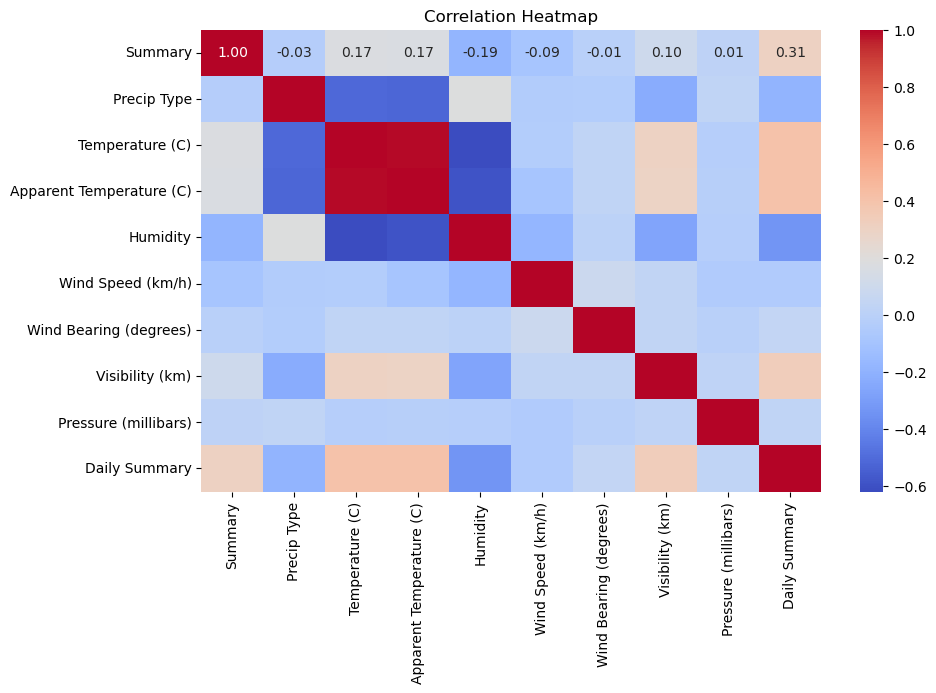

In [389]:
# visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



## Scaling Data

In [390]:
# Scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

scaler = StandardScaler()
# Seperating features and target variable
X = df1.drop('Summary', axis=1)
y = df1['Summary']

X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.29805383, -0.37551335, -0.43699118, ...,  1.42113637,
         0.06038337,  1.153029  ],
       [-0.29805383, -0.38816766, -0.45250544, ...,  1.42113637,
         0.06706364,  1.153029  ],
       [-0.29805383, -0.38575731, -0.24547025, ...,  1.16455244,
         0.0712054 ,  1.153029  ],
       ...,
       [-0.29805383,  0.98753643,  0.97373699, ...,  1.5019128 ,
         0.06746445,  0.64426946],
       [-0.29805383,  0.93149593,  0.92398435, ...,  1.5019128 ,
         0.07133901,  0.64426946],
       [-0.29805383,  0.81399163,  0.81966429, ...,  1.33085684,
         0.07414472,  0.64426946]])

In [391]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45639, 9), (30426, 9), (45639,), (30426,))

## Training the Model using Logistic Regression (Parametric Model)

In [392]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([2, 2, 0, ..., 1, 0, 1])

In [393]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred)*100)

Confusion Matrix:
[[5382 1910 3856]
 [2893 3102  657]
 [2386  801 9439]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49     11148
           1       0.53      0.47      0.50      6652
           2       0.68      0.75      0.71     12626

    accuracy                           0.59     30426
   macro avg       0.57      0.57      0.57     30426
weighted avg       0.58      0.59      0.58     30426

Accuracy Score:
58.90685597843949
